## Multivariate Time Series Forecasting using RNN (LSTM)
- https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-rnn-lstm-8d840f3f9aa7

In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

#### Timeseries Multivariant Forecasting with LSTM model
- Forecasting Load on Temp, Humidity, Wind and Precipitation.
- Train a LSTM model using hourly records from 2015 to 2019. 
- Then predict the future demand for Jan-2020 and Compare with actual data 

In [182]:
df1 = pd.read_csv('BTC_2022-01-01_2022-03-24_g300.csv')

In [183]:
print(df1.dtypes)

Unnamed: 0      int64
unix            int64
date           object
low           float64
high          float64
open          float64
close         float64
volume        float64
vol_fiat      float64
dtype: object


In [184]:
df1.shape

(23678, 9)

In [185]:
## Splitting the database
df1.rename(columns={'date':'Date','open':'Open','high':'High','low':'Low','close':'Close'},inplace=True)
df1.drop(columns=['vol_fiat','volume','Unnamed: 0','unix'],inplace=True,axis=1)

In [187]:
## Splitting the database
df2       = df1[['Date','Open','High','Low','Close']]
df2_date  = df1[['Date']]
df2_train = df2.iloc[0:20000,1:]

In [188]:
df2_train.head()

,Open,High,Low,Close
0,47718.04,47757.99,47665.90,47665.90
1,47691.42,47808.03,47660.86,47728.93
2,47556.44,47813.14,47543.19,47708.01
3,47537.32,47576.06,47511.94,47560.09
4,47538.02,47568.90,47496.52,47502.79


In [189]:
## Splitting the database
df2_test = df2.iloc[20000: , 1:]

In [190]:
df2       = df1[['Date','Open','High','Low','Close']]
df2_date  = df1[['Date']]

In [191]:
df2.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [192]:
#df['datetime']=pd.to_datetime(df['datetime'])
print('treino:',df2_train.shape,'teste:',df2_test.shape)

treino: (20000, 4) teste: (3678, 4)


In [193]:
df2_test.reset_index(inplace=True)
df2_test.head()

,index,Open,High,Low,Close
0,20000,38805.02,38822.27,38634.43,38663.37
1,20001,38805.03,38805.03,38771.27,38787.26
2,20002,38869.75,38869.75,38827.66,38851.48
3,20003,38795.04,38869.38,38795.04,38860.03
4,20004,38838.41,38838.41,38768.17,38783.78


In [195]:
sc = StandardScaler()
df2_train_scaled = sc.fit_transform(df2_train)

sc2 = StandardScaler()
df2_train_scaled_y = sc2.fit_transform(df2_train[['Open']])

print("Treino X:", df2_train_scaled.shape, "Treino y:", df2_train_scaled_y.shape)

Treino X: (20000, 4) Treino y: (20000, 1)


#####  Create an array for the previous values for each column.

In [196]:
hops = 14
no_records = df2_train_scaled.shape[0]
ncols = 4
X_train = []
y_train = []

for i in  range(14,no_records):
    X_train.append(df2_train_scaled[i-14:i])
    y_train.append(df2_train_scaled_y[i][0])

X_train , y_train = np.array(X_train,dtype=object) , np.array(y_train,dtype=object)

In [197]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [198]:
print("shape df2_train:", df2_train.shape, "shape df2_train_scaled:", df2_train_scaled.shape)

shape df2_train: (20000, 4) shape df2_train_scaled: (20000, 4)


In [199]:
X_train_shape = np.reshape(X_train, (X_train.shape[0] , X_train.shape[1], X_train.shape[2]) )

In [200]:
print("Treino X:", X_train.shape, "Treino y:", y_train.shape)

Treino X: (19986, 14, 4) Treino y: (19986,)


#### The Most Important part...
- Past values are import to predict the future demand 
- Model has to be dynamic to learn from past data and predict the future demand.
- Create parts of data having past 2 days (48 hours) 
- LSTM model will predict the 49th Hour Load prediction.

### Creating a LSTM Multivariant model
- Multistage Neural Network (Long Short Term Memory). 

In [201]:
model = Sequential()
model.add(LSTM(units=75, activation='relu', input_shape=(14, 4), return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(units=75))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))
model.compile(optimizer='adam', loss='mse')

In [202]:
history = model.fit(X_train_shape, y_train, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
400/400 [==============================] - 9s 16ms/step - loss: 0.5379
Epoch 2/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5175
Epoch 3/100
400/400 [==============================] - 7s 17ms/step - loss: 0.5153
Epoch 4/100
400/400 [==============================] - 7s 17ms/step - loss: 0.5138
Epoch 5/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5133
Epoch 6/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5127
Epoch 7/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5121
Epoch 8/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5118
Epoch 9/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5117
Epoch 10/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5114
Epoch 11/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5112
Epoch 12/100
400/400 [==============================] - 7s 18ms/step - loss: 0.5110
E

In [203]:
df1_test_last14 = df2_train.iloc[-14:]
df1_test_full   = df2_test

full_df = pd.concat( (df1_test_last14 , df1_test_full), axis=0)
full_df.drop(columns=['index'],axis=1,inplace=True)

In [204]:
print(full_df.shape)

(3692, 4)


In [205]:
full_df.head()

,Open,High,Low,Close
19986,38799.87,38817.00,38773.78,38803.99
19987,38811.91,38848.86,38782.88,38788.77
19988,38783.56,38871.26,38764.15,38845.65
19989,38825.21,38853.32,38782.54,38790.67
19990,38812.76,38845.15,38755.09,38830.66


In [206]:
full_df = sc.transform(full_df)
print(full_df.shape)

(3692, 4)


#### Reshaping the test data frame in similar way as we did for training dataset.

In [209]:
hops = 14
no_records = 3678
ncols = 4
X_train_shape_pred = []


for i in  range(14,no_records):
    X_train_shape_pred.append(full_df[i-14:i])
    

X_train_shape_pred = np.array(X_train_shape_pred,dtype=object)

In [210]:
print('size teste:',df2_test.shape)

size teste: (3678, 5)


In [211]:
print("shape:", X_train_shape_pred.shape , "length:",len(X_train_shape_pred))

shape: (3664, 14, 4) length: 3664


In [212]:
X_train_shape_pred = np.asarray(X_train_shape_pred).astype(np.float32)

ytest = model.predict(X_train_shape_pred)

115/115 [==============================] - 1s 4ms/step


In [213]:
X_train_shape_pred

array([[[-0.676, -0.688, -0.666, -0.674],
        [-0.672, -0.678, -0.663, -0.679],
        [-0.681, -0.67 , -0.669, -0.66 ],
        ...,
        [-0.688, -0.702, -0.699, -0.717],
        [-0.705, -0.707, -0.689, -0.691],
        [-0.713, -0.72 , -0.696, -0.705]],

       [[-0.672, -0.678, -0.663, -0.679],
        [-0.681, -0.67 , -0.669, -0.66 ],
        [-0.667, -0.676, -0.663, -0.678],
        ...,
        [-0.705, -0.707, -0.689, -0.691],
        [-0.713, -0.72 , -0.696, -0.705],
        [-0.674, -0.687, -0.712, -0.72 ]],

       [[-0.681, -0.67 , -0.669, -0.66 ],
        [-0.667, -0.676, -0.663, -0.678],
        [-0.671, -0.679, -0.672, -0.665],
        ...,
        [-0.713, -0.72 , -0.696, -0.705],
        [-0.674, -0.687, -0.712, -0.72 ],
        [-0.674, -0.692, -0.667, -0.68 ]],

       ...,

       [[ 0.545,  0.529,  0.544,  0.531],
        [ 0.538,  0.531,  0.55 ,  0.547],
        [ 0.499,  0.53 ,  0.513,  0.539],
        ...,
        [ 0.422,  0.415,  0.438,  0.423],
     

In [214]:
ytest_final_pred = sc2.inverse_transform(ytest)
print(ytest_final_pred.shape)


(3664, 10)


In [220]:
print(ytest_final_pred[:,0])

(3664, 10) [40858.656 40858.656 40858.656 ... 42140.402 42191.613 42193.895]


In [221]:
final_open_pred = pd.DataFrame(ytest_final_pred[:,0])
final_open_pred.columns=['final_open_pred']

In [229]:
final_open_pred.head()

,final_open_pred
0,40858.65625
1,40858.65625
2,40858.65625
3,40858.65625
4,40858.65625


In [223]:
fully_final = pd.concat( (final_open_pred , df2_test ), axis=1)

In [226]:
fully_final.shape

(3678, 6)

In [224]:
fully_final.head()

,final_open_pred,index,Open,High,Low,Close
0,40858.65625,20000,38805.02,38822.27,38634.43,38663.37
1,40858.65625,20001,38805.03,38805.03,38771.27,38787.26
2,40858.65625,20002,38869.75,38869.75,38827.66,38851.48
3,40858.65625,20003,38795.04,38869.38,38795.04,38860.03
4,40858.65625,20004,38838.41,38838.41,38768.17,38783.78


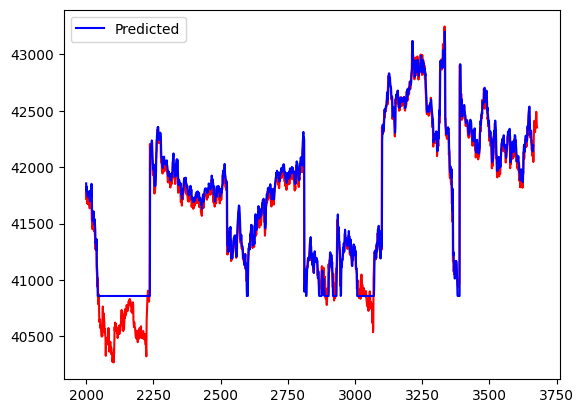

In [238]:
plt.plot(fully_final['Open'][fully_final['index']>=22000] , color='red')
plt.plot(fully_final['final_open_pred'][fully_final['index']>=22000] , color='blue', label='Predicted')
plt.legend()